In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [316]:
df = pd.read_csv("eth_usdt_3min.csv")
prices = df['close'].values

In [317]:
df.head()

,timestamp,open,high,low,close,volume,MA_20,MA_50,MA_200,RSI,...,Trendline,MACD,Signal,Histogram,BL_Upper,BL_Lower,MN_Upper,MN_Lower,month,row_num
0,2024-01-01 02:21:00,2298.16,2298.17,2298.16,2298.17,34.3652,2298.6810,2301.8454,2291.87145,42.056560,...,2285.601167,-1.176527,-1.172155,-0.004372,2301.079407,2296.282593,2300.882591,2294.699642,648,3
1,2024-01-01 02:24:00,2297.40,2297.41,2296.36,2296.36,21.2303,2298.3030,2301.6252,2292.10965,35.213991,...,2285.661827,-1.119543,-1.127303,0.007760,2300.435577,2296.170423,2300.684845,2294.501896,648,6
2,2024-01-01 02:27:00,2296.81,2296.82,2296.81,2296.82,9.5169,2297.9500,2301.1694,2292.30570,38.547085,...,2285.722487,-1.116054,-1.131966,0.015912,2300.265236,2295.634764,2300.545236,2294.362287,648,9
3,2024-01-01 02:30:00,2296.73,2297.60,2296.27,2297.58,173.3708,2297.7045,2300.7192,2292.52080,44.956426,...,2285.783146,-0.948078,-1.077097,0.129018,2300.011389,2295.397611,2300.409333,2294.226384,648,12
4,2024-01-01 02:33:00,2297.96,2297.96,2297.32,2297.33,48.0246,2297.4775,2300.4142,2292.75185,43.518051,...,2285.843806,-0.677428,-0.907829,0.230401,2299.406737,2295.548263,2300.206438,2294.023489,648,15


In [318]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Создаем новый столбец с датой без времени
df['date'] = df['timestamp'].dt.date

# Группируем по дате и берем последнее значение close за день
daily_close = df.groupby('date')['close'].last().reset_index()
prices = daily_close['close'].values.astype(np.float32)
y_train = prices[:400]
y_test = prices[400:]

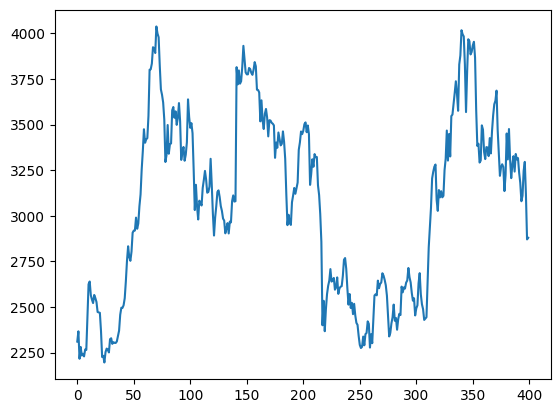

In [319]:
plt.plot(y_train)

In [320]:
N = len(y_train)
L = N//2
K = N - L + 1 

H = np.zeros((L, K))
for i in range(K):
    H[:, i] = y_train[i:i+L]

U, S, Vt = np.linalg.svd(H, full_matrices=False)
spectrum = S**0.5

In [321]:
len(spectrum)

200

In [322]:
spectrum[150:]

array([23.75082542, 23.60703815, 23.34391356, 23.22600069, 23.21341657,
       23.03918747, 22.81839812, 22.73060969, 22.58599543, 22.28888497,
       22.26504687, 22.21925371, 22.08292923, 21.9257016 , 21.64482667,
       21.6369929 , 21.59039792, 21.11727976, 20.79811514, 20.44921201,
       20.216923  , 20.03146977, 19.83820385, 19.77236964, 19.49533616,
       19.09777396, 18.95514714, 18.47345266, 18.44854705, 18.08822747,
       17.79855736, 17.52486168, 17.29740561, 16.94676705, 16.89033181,
       16.46678099, 16.35344432, 15.70090088, 15.02823595, 14.49012388,
       13.75191279, 12.93781795, 11.76033173, 11.40691585, 10.86467179,
       10.30475949, 10.14656526,  7.58356205,  5.97428632,  5.04975208])

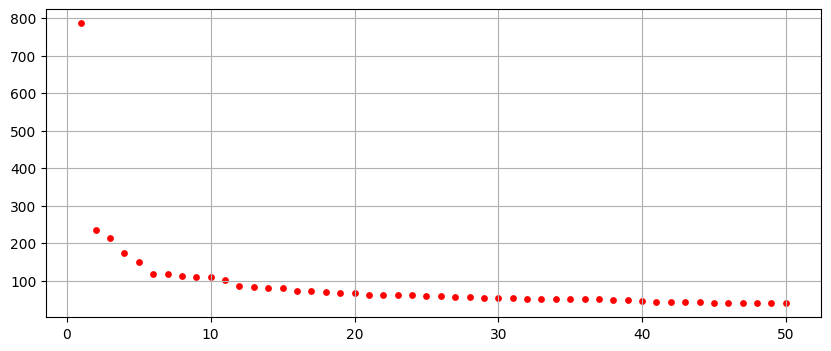

In [ ]:
plt.figure(figsize=(10,4), )
plt.scatter(np.arange(1, 51), spectrum[:75], s=15, color='red')
plt.grid()

Кумулятивная доля дисперсии для первых 10 компонент:
[0.56673968 0.61774284 0.65992495 0.68721084 0.70803415 0.72086645
 0.7333378  0.74488415 0.75619583 0.76741611]


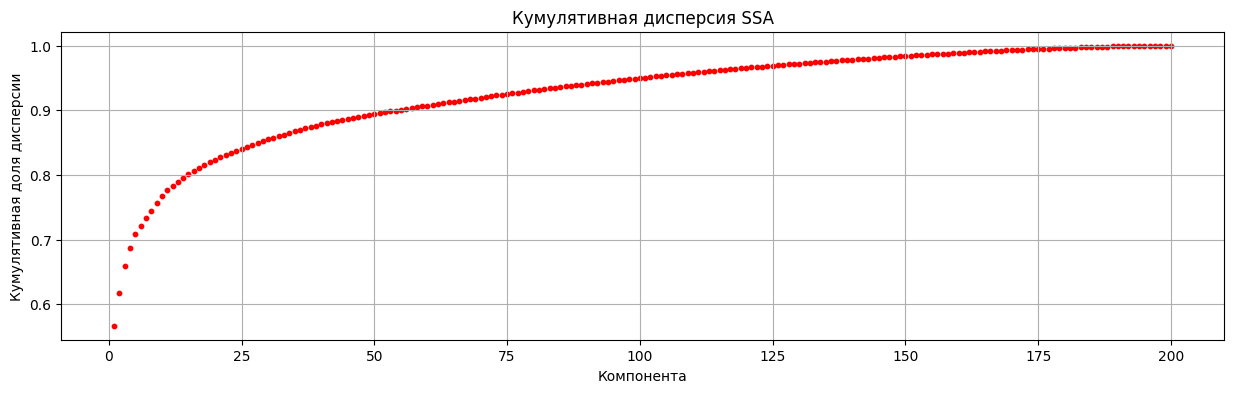

In [324]:
S_squared = spectrum**2

# Кумулятивная сумма квадратов
cumsum_variance = np.cumsum(S_squared)

# Общая сумма квадратов
total_variance = np.sum(S_squared)

# Доля кумулятивной дисперсии
cumulative_ratio = cumsum_variance / total_variance

# Вывод первых 10 значений
print("Кумулятивная доля дисперсии для первых 10 компонент:")
print(cumulative_ratio[:10])

# Визуализация
plt.figure(figsize=(15,4))
plt.scatter(np.arange(1, len(S)+1), cumulative_ratio, s=10, color='red')
plt.xlabel('Компонента')
plt.ylabel('Кумулятивная доля дисперсии')
plt.title('Кумулятивная дисперсия SSA')
plt.grid(True)
plt.show()


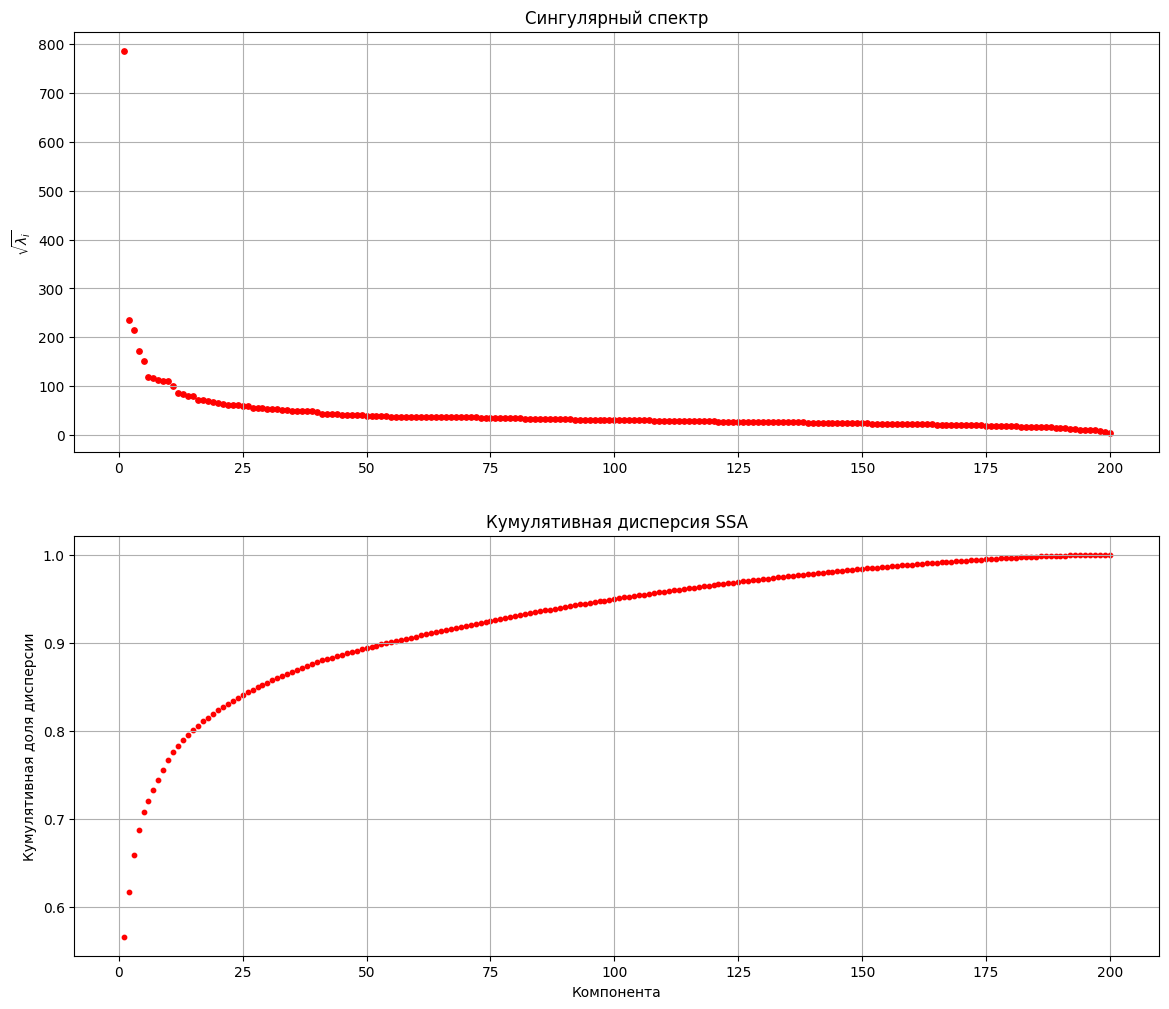

In [343]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

ax1.scatter(np.arange(1, len(S)+1), spectrum, s=15, color='red')
ax1.set_ylabel(r'$\sqrt{\lambda_i}$')
ax1.set_title('Сингулярный спектр')
ax1.grid(True)

ax2.scatter(np.arange(1, len(S)+1), cumulative_ratio, s=10, color='red')
ax2.set_xlabel('Компонента')
ax2.set_ylabel('Кумулятивная доля дисперсии')
ax2.set_title('Кумулятивная дисперсия SSA')
ax2.grid(True)
fig.savefig('spectrum.png')


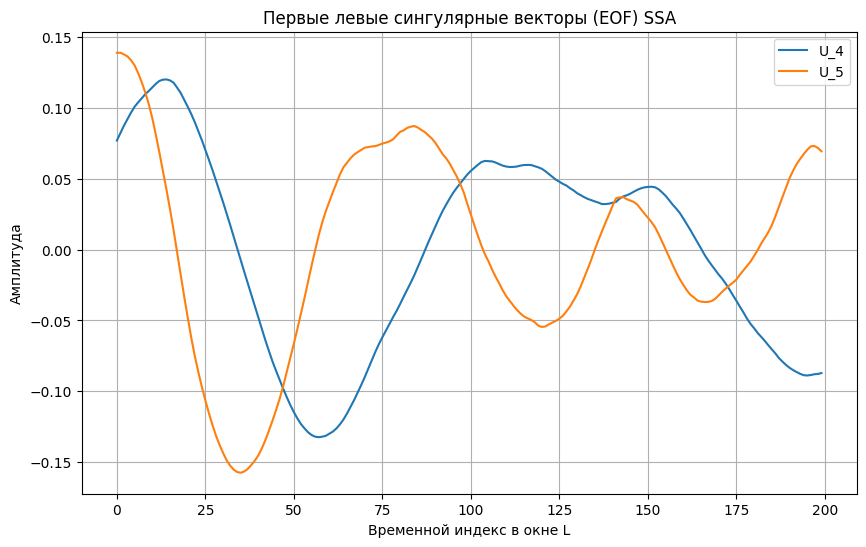

In [325]:
num_vectors = 2

plt.figure(figsize=(10, 6))

for i in range(3, 3+num_vectors):
    plt.plot(U[:, i], label=f'U_{i+1}')

plt.xlabel('Временной индекс в окне L')
plt.ylabel('Амплитуда')
plt.title('Первые левые сингулярные векторы (EOF) SSA')
plt.legend()
plt.grid(True)
plt.show()


In [326]:
red_spec = spectrum[:75]

In [327]:
trend = [[i for i in range(1)]]
season = [[i, i+1] for i in range(1, 75)]

In [328]:
X_elem = [np.sqrt(S[i]) * np.outer(U[:, i], Vt[i, :]) for i in range(len(S))]

trend = [[0]]   
season = [[i, i+1] for i in range(1, 75, 2)] 

groups = trend + season 

X_grouped = []
for g in groups:
    Xg = sum([X_elem[i] for i in g])
    X_grouped.append(Xg)

X_reconstructed = sum(X_grouped)

In [329]:
import numpy as np

def forecast_from_X(X_reconstructed, steps=0):
    """
    Прогноз ряда из восстановленной матрицы X_reconstructed (после перегруппировки SSA).
    
    X_reconstructed : np.ndarray, размер L x K, редуцированная матрица группы
    steps : int, количество прогнозируемых точек после конца ряда
    
    Возвращает: np.ndarray, восстановленный ряд + прогноз
    """
    L, K = X_reconstructed.shape
    N = L + K - 1
    
    # 1. Диагональное усреднение для восстановления ряда
    y_reconstructed = np.zeros(N)
    counts = np.zeros(N)
    
    for i in range(L):
        for j in range(K):
            y_reconstructed[i + j] += X_reconstructed[i, j]
            counts[i + j] += 1
    y_reconstructed /= counts
    
    # 2. Построение LRR коэффициентов из левых сингулярных векторов
    U, _, _ = np.linalg.svd(X_reconstructed, full_matrices=False)
    U_group = U  # все левые сингулярные векторы этой группы
    
    U_bar = U_group[:-1, :]
    pi = U_group[-1, :]
    nu2 = np.sum(pi**2)
    A = (U_bar @ pi) / (1 - nu2)
    
    # 3. Прогноз на steps точек
    y_pred = list(y_reconstructed[:L-1])
    
    for t in range(L-1, N + steps):
        next_val = np.dot(A, y_pred[-(L-1):][::-1])
        y_pred.append(next_val)
    
    return np.array(y_pred)


In [330]:
# Предположим, X_reconstructed — это сумма всех элементарных матриц выбранной группы
y_forecast = forecast_from_X(X_reconstructed, steps=44)

print("Длина восстановленного + прогнозированного ряда:", len(y_forecast))


Длина восстановленного + прогнозированного ряда: 444


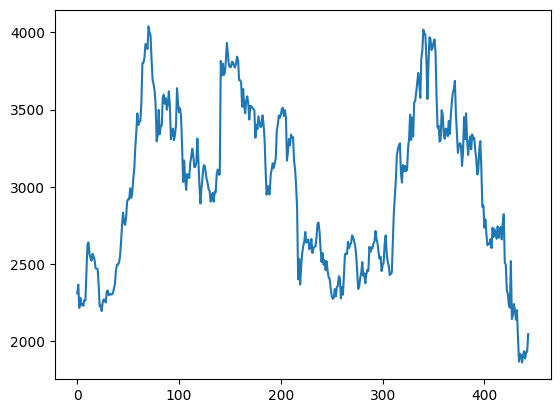

In [331]:
plt.plot(prices)

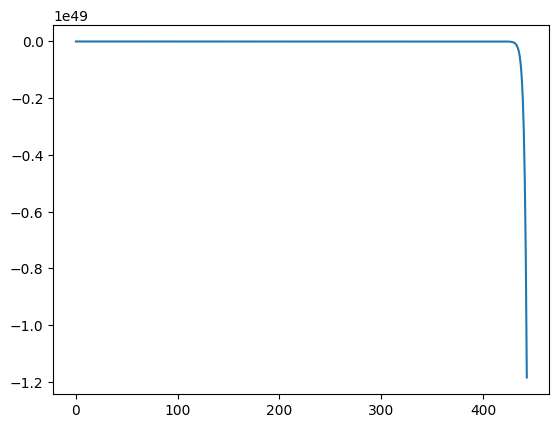

In [332]:
plt.plot(y_forecast)